In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.random import randint, choice
import os

In [2]:
try:
    os.makedirs("curvature/curve_in_lines/stimuli/", exist_ok = True)
    os.makedirs("curvature/curve_in_lines/target/", exist_ok = True)
    os.makedirs("curvature/curve_in_lines/gt/", exist_ok = True)
    os.makedirs("curvature/line_in_curves/stimuli/", exist_ok = True)
    os.makedirs("curvature/line_in_curves/target/", exist_ok = True)
    os.makedirs("curvature/line_in_curves/gt/", exist_ok = True)
except:
    pass

In [7]:
def gen_stimuli(num_item, dis_stim, tar_stim):
#     obj_size = feature_size
    pos_err = int((feature_size-obj_size)*deg2px)
#     print(pos_err)
    
    stim_img = np.uint8(0*np.ones((int(view_area*deg2px), int(view_area*deg2px))))
    tar_img = np.uint8(0*np.ones((int(obj_size*deg2px), int(obj_size*deg2px))))
    gt_img = np.uint8(0*np.ones((int(view_area*deg2px), int(view_area*deg2px))))
    
    idxs = choice(grid_x*grid_y, num_item, replace=False)
    tar_idx_pos = randint(num_item)
    
    si = 0

    for i in range(num_item):
        pos_y = int(idxs[i]/grid_x)*int(feature_size*deg2px) + randint(pos_err)
        pos_x = (idxs[i]%grid_y)*int(feature_size*deg2px) + randint(pos_err)
        
        gt_pos_y = int(idxs[i]/grid_x)*int(feature_size*deg2px)
        gt_pos_x = (idxs[i]%grid_y)*int(feature_size*deg2px) 
        
        if idxs[i] == idxs[tar_idx_pos]:
            tar_img = tar_stim[si%len(tar_stim)]
            stim_img[pos_y:pos_y+tar_img.shape[0], pos_x:pos_x+tar_img.shape[1]] = tar_img
            gt_img[gt_pos_y:gt_pos_y+int(feature_size*deg2px), gt_pos_x:gt_pos_x+int(feature_size*deg2px)] = 255
        else:
            temp = dis_stim[si%len(tar_stim)]
            stim_img[pos_y:pos_y+temp.shape[0], pos_x:pos_x+temp.shape[1]] = temp
            
        si += 1
                
    return stim_img, tar_img, gt_img

deg2px = 30

view_area = 11.3 #in degress
grid_x, grid_y = 6, 6

feature_size = view_area/grid_x #in degress

obj_size = 1.6

curve_weight = (1/6) #in degress
curve_radius = 1 #in degress
curve_seg = 1.3 #in degress

line_height = (1/6 + 1/30) #in degress
line_width = 1.2 #in degress

num_items = [8, 16, 32]
num_stimuli_per_case = 30

gt_mask = []

for i in range(grid_x*grid_y):
    pos_y = int(i/grid_x)*int(feature_size*deg2px)
    pos_x = (i%grid_y)*int(feature_size*deg2px)
    gt_img = np.uint8(np.zeros((int(view_area*deg2px), int(view_area*deg2px))))
    gt_img[pos_y:pos_y+int(feature_size*deg2px), pos_x:pos_x+int(feature_size*deg2px)] = 255
    
    gt_mask.append(gt_img)
    
gt_mask = np.asarray(gt_mask)
np.save('curvature/gt_mask.npy', gt_mask)

In [8]:
temp = np.uint8(np.zeros((int(obj_size*deg2px), int(obj_size*deg2px))))
temp = cv2.ellipse(temp, (int(obj_size*deg2px/2), int((obj_size-(curve_radius*np.cos(curve_seg/2) + curve_radius))*deg2px/2)), (int(curve_radius*deg2px), int(curve_radius*deg2px)), 0, int((1/4 - curve_seg/(4*np.pi))*360), int((1/4 + curve_seg/(4*np.pi))*360), 255, int(curve_weight*deg2px)) 

curve = []
for angle in [-45, -90, -135, 180]:
    M = cv2.getRotationMatrix2D((int(obj_size*deg2px)/2,int(obj_size*deg2px)/2),angle,1)
    dst = cv2.warpAffine(temp,M,(int(obj_size*deg2px),int(obj_size*deg2px)))
    curve.append(dst)
    
temp = np.uint8(np.zeros((int(obj_size*deg2px), int(obj_size*deg2px))))
temp[int((obj_size-line_height)*deg2px/2):int((obj_size+line_height)*deg2px/2), int((obj_size-line_width)*deg2px/2):int((obj_size+line_width)*deg2px/2)] = 255

line = []
for angle in [-45, -90, -135, 180]:
    M = cv2.getRotationMatrix2D((int(obj_size*deg2px)/2,int(obj_size*deg2px)/2),angle,1)
    dst = cv2.warpAffine(temp,M,(int(obj_size*deg2px),int(obj_size*deg2px)))
    line.append(dst)

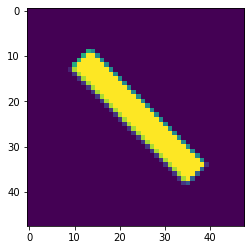

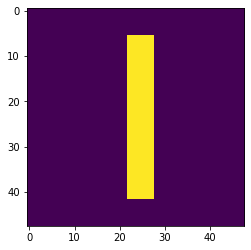

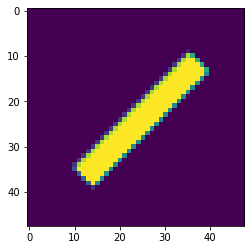

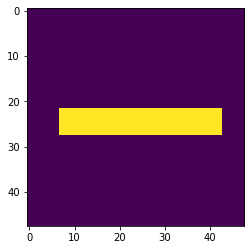

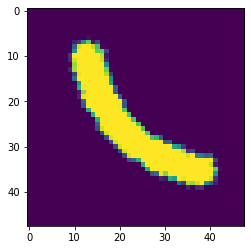

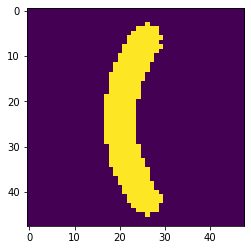

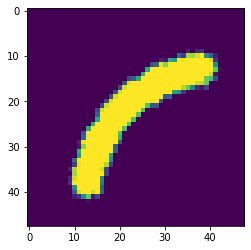

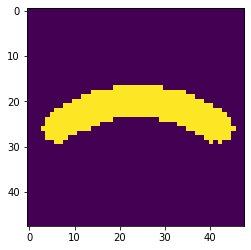

In [9]:
i = 0
for img in line+curve:
    plt.figure(i)
    plt.imshow(img)
    i += 1

In [10]:
# curve in lines
for i in range(len(num_items)):
    for n in range(1, num_stimuli_per_case+1):
        stim_img, tar_img, gt_img = gen_stimuli(num_items[i], line, curve)
            
        file_name = str(i*num_stimuli_per_case + n) + ".jpg"
        cv2.imwrite("curvature/curve_in_lines/stimuli/" + file_name, stim_img)
        cv2.imwrite("curvature/curve_in_lines/target/" + file_name, tar_img)
        cv2.imwrite("curvature/curve_in_lines/gt/" + file_name, gt_img)

# line in curves
for i in range(len(num_items)):
    for n in range(1, num_stimuli_per_case+1):
        stim_img, tar_img, gt_img = gen_stimuli(num_items[i], curve, line)
            
        file_name = str(i*num_stimuli_per_case + n) + ".jpg"
        cv2.imwrite("curvature/line_in_curves/stimuli/" + file_name, stim_img)
        cv2.imwrite("curvature/line_in_curves/target/" + file_name, tar_img)
        cv2.imwrite("curvature/line_in_curves/gt/" + file_name, gt_img)